### AGN Disk generation notebook
Please read more at
* Code paper: https://arxiv.org/pdf/2403.00060
* Python module documentation and examples: https://dariagangardt.github.io/pAGN/

In [1]:
from pagn import Thompson
from pagn import Sirko
import pagn.constants as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sirko & Goodman 2003 AGN disk model

Mbh=1e6*ct.MSun #10^6 solar mass SMBH

le=0.5 #Eddington ratio
Mdot= None #let the accretion rate be calculated through lE
alpha=0.01 #standard Shakura Sunyaev parameter value
X=0.7 #Hydrogen abundance is 0.7 for this disk
b=0 #Let's see the alpha-disk case
Opacity="combined" #most up to date opacity values

sk = Sirko.SirkoAGN(Mbh=Mbh, le=le, Mdot=Mdot, alpha=alpha, X=X,
                    b=b, opacity = Opacity)
sk.solve_disk(N=1e4) ; #10^4 tends to be a sufficient resolution for most Mbh values
sk.Sigma = 2 * sk.rho * sk.h # surface density

### Sirko & Goodman 2003 parameters ###
Mbh = 1.000000e+06 MSun
Mdot = 1.298344e-02 MSun/yr
le = 0.5
Rs = 9.570121e-08 pc
Rmin = 2.500000e+00 Rs
Rmax = 1.000000e+07 Rs, 9.570121e-01 pc
alpha = 0.01
b = 0
eps = 0.1
X = 0.7
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
Q<1 at i=5849 (R=2.62e+04 Rs)
Beginning star formation at index 5849
Mdisk = 703749.3876329744 Msun
Mdisk/Mbh = 0.7037493876329745


In [3]:
# Thompson et al. 2005 AGN disk model

sigma = 50e3 #stellar dispersion relation
mbh = 1e6*ct.MSun
epsilon=1e-3 #Star formation radiative efficiency
m= 0.2 #Value for angular momentum efficiency as suggested by Thompson et al. 2005
xi= 1. #Approximate supernovae radiative fraction as suggested by Thompson et al. 2005
Mdot_out=.5e-2 * ct.MSun / ct.yr #For mbh in 10^8-10^9 Msun range, the outer accretion rate scaling should be sufficient for bright AGN formation
Rout=None # Let's use 1e7 Schwarzchild radii for outer boundary
Rin=None #Rin is 3 Schwarzchild radii
opacity="combined" #most up to date opacity values

tho = Thompson.ThompsonAGN(Mbh = mbh, sigma = sigma, epsilon = epsilon, m = m, xi = xi,
                      Mdot_out= Mdot_out, Rout = Rout, Rin = Rin, opacity =opacity)
tho.solve_disk(N=1e4)
tho.Sigma = 2 * tho.rho * tho.h  # surface density

### Thompson et al. 2005 parameters ###
Mbh = 1.000000e+06 MSun
Mdot_out = 5.000000e-03 MSun/yr
Rs = 9.570121e-08 pc
Rin = 3.000000e+00 Rs
Rout = 1.000000e+07 Rs = 9.570121e-01 pc
sigma = 5.000000e+01 km/s
epsilon =  0.001
m =  0.2
xi =  1.0
Opacity = combined

debug = False
xtol = 1e-10
root method = lm
 ### Beginning integration at Rmax ###
### Switching to no star formation regime at i = 9052, R = 2409668.837893142Rs ###
Mdisk = 38606.141783031584 Msun
Mdisk/Mbh = 0.03860614178303159


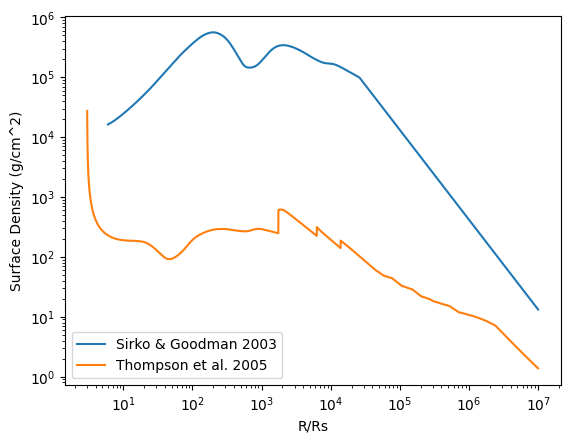

In [4]:
plt.loglog(sk.R/sk.Rs, sk.Sigma*ct.SI_to_gcm2, label = "Sirko & Goodman 2003")
plt.loglog(tho.R / tho.Rs, tho.Sigma*ct.SI_to_gcm2, label = "Thompson et al. 2005")
plt.xlabel("R/Rs")
plt.ylabel("Surface Density (g/cm^2)")
plt.legend();

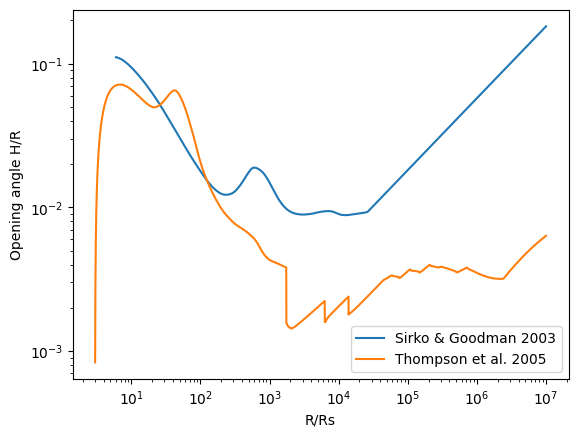

In [5]:
plt.loglog(sk.R/sk.Rs, sk.h / sk.R, label = "Sirko & Goodman 2003")
plt.loglog(tho.R/tho.Rs, tho.h / tho.R, label = "Thompson et al. 2005")
plt.xlabel("R/Rs")
plt.ylabel("Opening angle H/R")
plt.legend();

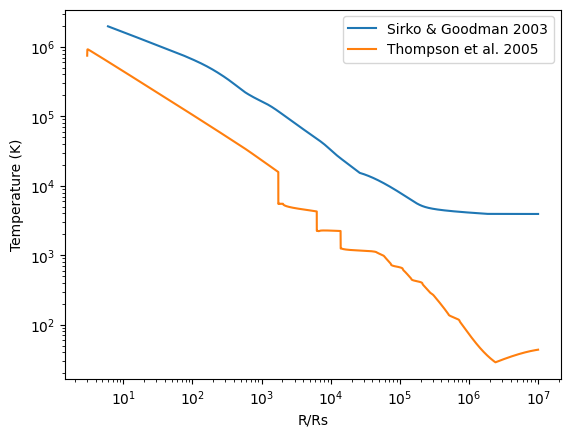

In [6]:
plt.loglog(sk.R/sk.Rs, sk.T, label = "Sirko & Goodman 2003")
plt.loglog(tho.R / tho.Rs, tho.T, label = "Thompson et al. 2005")
plt.xlabel("R/Rs")
plt.ylabel("Temperature (K)")
plt.legend();

In [7]:
T_sk = sk.T
R_sk = sk.R
Sigma_sk = sk.Sigma
HR_sk = sk.h / sk.R
mbh_sk = sk.Mbh / ct.MSun

T_tho = tho.T
R_tho = tho.R
Sigma_tho = tho.Sigma
HR_tho = tho.h / tho.R
mbh_tho = tho.Mbh / ct.MSun

# Put the black hole mass in to the filename
mantissa = int(np.floor(np.log10(mbh_sk)))
value = mbh_sk/10**mantissa
fname = 'Sirko_SMBH_{:.0f}e{}.npz'.format(value,mantissa)
np.savez(fname,T=T_sk,R=R_sk,Sigma=Sigma_sk,HR=HR_sk,mbh=mbh_sk)
print('Saving to file '+fname)

# Put the black hole mass in to the filename
mantissa = int(np.floor(np.log10(mbh_tho)))
value = mbh_tho/10**mantissa
fname = 'Thompson_SMBH_{:.0f}e{}.npz'.format(value,mantissa)
np.savez(fname,T=T_tho,R=R_tho,Sigma=Sigma_tho,HR=HR_tho,mbh=mbh_tho)
print('Saving to file '+fname)

Saving to file Sirko_SMBH_1e6.npz
Saving to file Thompson_SMBH_1e6.npz
